In [1]:
# download mini-coco dataset, and then save scatter plot of ground truth dimensions of bounding boxes
import os, sys, json, requests, zipfile, io
import numpy as np, matplotlib.pyplot as plt

# download mini-coco dataset
url = 'https://raw.githubusercontent.com/chongruo/tiny-coco/master/small_coco/instances_train2017_small.json'
response = requests.get(url)
response.raise_for_status()
data = response.json()


In [2]:
# View a few of the images
for i in range(2):
    image = data['images'][i]
    print(f"Image {i} has id {image['id']} and file name {image['file_name']}")
    print(f"Image {i} has {len(data['annotations'][i])} annotations")
    print(f"Image {i} has dimensions {image['width']}x{image['height']}")
    print(f"Image {i} has url {image['coco_url']}")
    print()

Image 0 has id 391895 and file name 000000391895.jpg
Image 0 has 7 annotations
Image 0 has dimensions 640x360
Image 0 has url http://images.cocodataset.org/train2017/000000391895.jpg

Image 1 has id 522418 and file name 000000522418.jpg
Image 1 has 7 annotations
Image 1 has dimensions 640x480
Image 1 has url http://images.cocodataset.org/train2017/000000522418.jpg



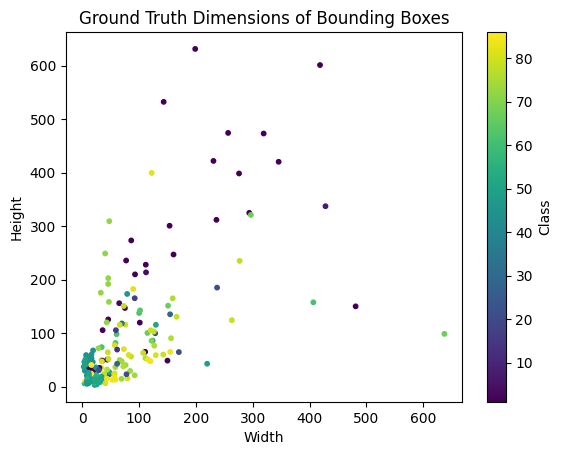

In [3]:
# Save scatter plot of ground truth dimensions of bounding boxes
# dimensions = [width, height]
dimensions = [[], [], []] # [width, height, classname]
for i in range(len(data['annotations'])):
    dimensions[0].append(data['annotations'][i]['bbox'][2])
    dimensions[1].append(data['annotations'][i]['bbox'][3])
    dimensions[2].append(data['annotations'][i]['category_id'])
plt.scatter(dimensions[0], dimensions[1], c=dimensions[2], cmap='viridis', s = 10)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Ground Truth Dimensions of Bounding Boxes')
plt.colorbar(label='Class')
plt.show()




In [4]:
"""
# Various plots 

# Now, plot h vs h/b
h = dimensions[1]
w = dimensions[0]
h_b = np.divide(h, w)
plt.scatter(h, h_b, c=dimensions[2], s =20)
plt.xlabel('Height')
plt.ylabel('Height/Width')
plt.title('Height vs Height/Width')
# tell which class is which color
plt.colorbar(label='Class')
plt.show()

# Now, plot log h vs log b
log_h = np.log(h)
log_b = np.log(w)
plt.scatter(log_h, log_b, c=dimensions[2], s =25)
plt.xlabel('log(Height)')
plt.ylabel('log(Width)')
plt.title('log(Height) vs log(Width)')
# tell which class is which color
plt.colorbar(label='Class')
plt.show()
# Now, plot h vs log(h/b)
log_h_b = np.log(h_b)
log_h = np.log(h)
plt.scatter(log_h, log_h_b, c=dimensions[2], s =25)
plt.xlabel('Height')
plt.ylabel('log(Height/Width)')
plt.title('h vs log(h/b)')
# tell which class is which color
plt.colorbar(label='Class')
plt.show()
# Now, plot w vs log(h/b)
log_h_b = np.log(h_b)
log_w = np.log(w)
plt.scatter(log_w, log_h_b, c=dimensions[2], s =25)
plt.xlabel('Width')
plt.ylabel('log(Height/Width)')
plt.title('w vs log(h/b)')
# tell which class is which color
plt.colorbar(label='Class')
plt.show()
"""

"\n# Various plots \n\n# Now, plot h vs h/b\nh = dimensions[1]\nw = dimensions[0]\nh_b = np.divide(h, w)\nplt.scatter(h, h_b, c=dimensions[2], s =20)\nplt.xlabel('Height')\nplt.ylabel('Height/Width')\nplt.title('Height vs Height/Width')\n# tell which class is which color\nplt.colorbar(label='Class')\nplt.show()\n\n# Now, plot log h vs log b\nlog_h = np.log(h)\nlog_b = np.log(w)\nplt.scatter(log_h, log_b, c=dimensions[2], s =25)\nplt.xlabel('log(Height)')\nplt.ylabel('log(Width)')\nplt.title('log(Height) vs log(Width)')\n# tell which class is which color\nplt.colorbar(label='Class')\nplt.show()\n# Now, plot h vs log(h/b)\nlog_h_b = np.log(h_b)\nlog_h = np.log(h)\nplt.scatter(log_h, log_h_b, c=dimensions[2], s =25)\nplt.xlabel('Height')\nplt.ylabel('log(Height/Width)')\nplt.title('h vs log(h/b)')\n# tell which class is which color\nplt.colorbar(label='Class')\nplt.show()\n# Now, plot w vs log(h/b)\nlog_h_b = np.log(h_b)\nlog_w = np.log(w)\nplt.scatter(log_w, log_h_b, c=dimensions[2], s =

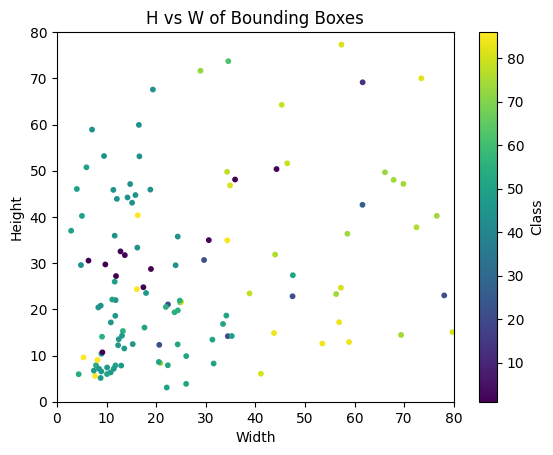

In [5]:
# Save scatter plot of ground truth dimensions of bounding boxes
# dimensions = [width, height]
dimensions = [[], [], []] # [width, height, classname]
for i in range(len(data['annotations'])):
    dimensions[0].append(data['annotations'][i]['bbox'][2])
    dimensions[1].append(data['annotations'][i]['bbox'][3])
    dimensions[2].append(data['annotations'][i]['category_id'])
plt.scatter(dimensions[0], dimensions[1], c=dimensions[2], cmap='viridis', s = 10)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('H vs W of Bounding Boxes')
plt.xlim(0,80)
plt.ylim(0,80)
plt.colorbar(label='Class')
plt.show()




In [6]:
print(f'{len(dimensions[0])} bounding boxes')
print(f'{len(set(dimensions[2]))} classes')
print("Done!!")

197 bounding boxes
37 classes
Done!!


In [7]:
"""# Now, peform k-means clustering on the data
# First, determine the optimal number of clusters
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(np.array([log_h, log_b]).T)
    kmeanModel.fit(np.array([log_h, log_b]).T)
    distortions.append(sum(np.min(cdist(np.array([log_h, log_b]).T, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / np.array([log_h, log_b]).T.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

'''[1.476637921680662, 0.9005316490021292, 0.7764816714970614, 0.6750777081890063, 0.5821656179497472, 0.520486573262661, 0.4785843579026123, 0.4580471804575761, 0.43183632266731603]'''

# Thus, k = 2 is the optimal number of clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(np.array([log_h, log_b]).T)
y_kmeans = kmeans.predict(np.array([log_h, log_b]).T)

plt.scatter(log_h, log_b, c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('log(Height)')
plt.ylabel('log(Width)')
plt.title('log(Height) vs log(Width)')
plt.show()

#"""

"# Now, peform k-means clustering on the data\n# First, determine the optimal number of clusters\nfrom sklearn.cluster import KMeans\nfrom sklearn import metrics\nfrom scipy.spatial.distance import cdist\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# k means determine k\ndistortions = []\nK = range(1,10)\nfor k in K:\n    kmeanModel = KMeans(n_clusters=k).fit(np.array([log_h, log_b]).T)\n    kmeanModel.fit(np.array([log_h, log_b]).T)\n    distortions.append(sum(np.min(cdist(np.array([log_h, log_b]).T, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / np.array([log_h, log_b]).T.shape[0])\n\n# Plot the elbow\nplt.plot(K, distortions, 'bx-')\nplt.xlabel('k')\nplt.ylabel('Distortion')\nplt.title('The Elbow Method showing the optimal k')\nplt.show()\n\n'''[1.476637921680662, 0.9005316490021292, 0.7764816714970614, 0.6750777081890063, 0.5821656179497472, 0.520486573262661, 0.4785843579026123, 0.4580471804575761, 0.43183632266731603]'''\n\n# Thus, k = 2 is the optimal number of

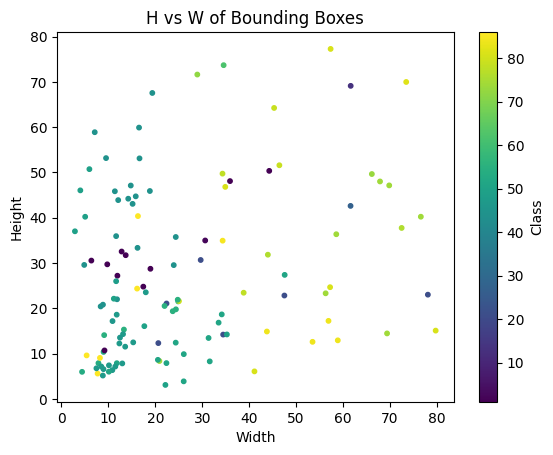

In [8]:
dimensions = [[], [], []] # [width, height, classname]
for i in range(len(data['annotations'])):
    if data['annotations'][i]['bbox'][2] < 80 and data['annotations'][i]['bbox'][3] < 80:

        dimensions[0].append(data['annotations'][i]['bbox'][2])
        dimensions[1].append(data['annotations'][i]['bbox'][3])
        dimensions[2].append(data['annotations'][i]['category_id'])
plt.scatter(dimensions[0], dimensions[1], c=dimensions[2], cmap='viridis', s = 10)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('H vs W of Bounding Boxes')
plt.colorbar(label='Class')
plt.show()


In [9]:
"""

# K-means clustering on the reduced data, non-log values
distortions = []    
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(np.array([h, w]).T)
    kmeanModel.fit(np.array([h, w]).T)
    distortions.append(sum(np.min(cdist(np.array([h, w]).T, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / np.array([h, w]).T.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method  k')

plt.show()


k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(np.array([h, w]).T)
y_kmeans = kmeans.predict(np.array([h, w]).T)

plt.scatter(h, w, c=y_kmeans, s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)
plt.xlabel('Height')
plt.ylabel('Width')
plt.title('Height vs Width')
plt.show()
"""

"\n\n# K-means clustering on the reduced data, non-log values\ndistortions = []    \nK = range(1,10)\nfor k in K:\n    kmeanModel = KMeans(n_clusters=k).fit(np.array([h, w]).T)\n    kmeanModel.fit(np.array([h, w]).T)\n    distortions.append(sum(np.min(cdist(np.array([h, w]).T, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / np.array([h, w]).T.shape[0])\n\n# Plot the elbow\nplt.plot(K, distortions, 'bx-')\nplt.xlabel('k')\nplt.ylabel('Distortion')\nplt.title('The Elbow Method  k')\n\nplt.show()\n\n\nk = 3\nkmeans = KMeans(n_clusters=k)\nkmeans.fit(np.array([h, w]).T)\ny_kmeans = kmeans.predict(np.array([h, w]).T)\n\nplt.scatter(h, w, c=y_kmeans, s=20, cmap='viridis')\ncenters = kmeans.cluster_centers_\nplt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)\nplt.xlabel('Height')\nplt.ylabel('Width')\nplt.title('Height vs Width')\nplt.show()\n"

In [10]:
# Mapping IDs
# Image ID -> Image Index
image_id_to_index = {image['id']: i for i, image in enumerate(data['images'])}

# Annotation ID -> Annotation Index
annotation_id_to_index = {annotation['id']: i for i, annotation in enumerate(data['annotations'])}

# Category ID -> Category Name
category_id_to_name = {category['id']: category['name'] for category in data['categories']}

# Image Index -> Annotation Indices
# Annotation Index -> Image Index
image_index_to_annotation_indices = {i: [] for i in range(len(data['images']))}
annotation_index_to_image_index = {i: data['annotations'][i]['image_id'] for i in range(len(data['annotations']))}
for annotation in data['annotations']:
    image_index = image_id_to_index[annotation['image_id']]
    image_index_to_annotation_indices[image_index].append(annotation_id_to_index[annotation['id']])
# print(image_index_to_annotation_indices)

# Image ID -> Annotation IDs
# Annotation ID -> Image ID
image_id_to_annotation_ids = {image['id']: [] for image in data['images']}
annotation_id_to_image_id = {annotation['id']: annotation['image_id'] for annotation in data['annotations']}
annotation_id_to_classification = {annotation['id']: category_id_to_name[annotation['category_id']] for annotation in data['annotations']}
for annotation in data['annotations']:
    image_id_to_annotation_ids[annotation['image_id']].append(annotation['id'])
# print(image_id_to_annotation_ids)

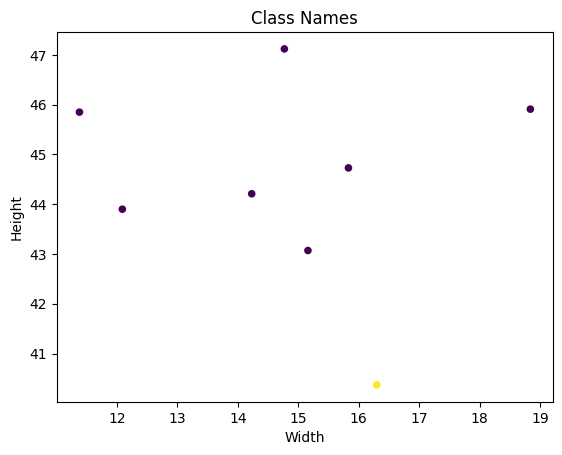

In [11]:
# reverse map a selected range of w and h values to boxes and back to class id and show plot
#  look near w=10, h=45 zone items

# 1. get the indices of the annotations boxes that fall in the range
anno_indices = []
image_indices = set()
for i in range(len(data['annotations'])):
    if abs(data['annotations'][i]['bbox'][2] - 15 )< 6 and abs(data['annotations'][i]['bbox'][3] - 45 )< 6: # ann: [0:x, 1:y, 2:w, 3:h]
        anno_indices.append(i)
        image_indices.add(data['annotations'][i]['image_id'])


# 2. get the class id of the boxes
class_ids = []
for i in anno_indices:
    class_ids.append([data['annotations'][i]['category_id'], data['annotations'][i]['bbox'][2], data['annotations'][i]['bbox'][3]]) # [class_id, w, h]


# 4. plot the class names
plt.scatter([i[1] for i in class_ids], [i[2] for i in class_ids], s=20, c = [i[0] for i in class_ids], cmap='viridis')
# for i in range(len(class_ids)):
#     plt.text(class_ids[i][1], class_ids[i][2], class_names[i])
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Class Names')
plt.show()



    



In [12]:
image_indices = list(image_indices)
# 5. get the image file namesn  of the boxes
image_file_names = [ data['images'][image_id_to_index[i]]['file_name'] for i in image_indices]
print(image_file_names)
# Along with annotations
for i in range(len(image_file_names)):
    print(f"Image {i} has id {image_indices[i]} and file name {image_file_names[i]}")
    print(f"  It has url {data['images'][image_id_to_index[image_indices[i]]]['coco_url']}")
    print(f"  It has {len(image_id_to_annotation_ids[image_indices[i]])} annotations")
    print(f"  Its Annotations are {image_id_to_annotation_ids[image_indices[i]]}")
    for j in image_index_to_annotation_indices[image_id_to_index[image_indices[i]]]:
        # print(f"   Annotation {j} has class {annotation_id_to_classification[j]}")
    #     print(f"   Annotation {j+1} Box (x, y, w, h) = {data['annotations'][j]['bbox']}")    
        # Only the annotations in the range
        if j in anno_indices:
            print(f"   Annotation {j+1} Box (x, y, w, h) = {data['annotations'][j]['bbox']}")
    #     pass
    # print()
    


['000000118113.jpg', '000000005802.jpg', '000000374628.jpg', '000000193271.jpg']
Image 0 has id 118113 and file name 000000118113.jpg
  It has url http://images.cocodataset.org/train2017/000000118113.jpg
  It has 11 annotations
  Its Annotations are [88176, 1648773, 1650346, 1650582, 1962899, 1980649, 1981186, 1987441, 1987697, 1988448, 1988599]
   Annotation 12 Box (x, y, w, h) = [126.72, 355.82, 18.84, 45.91]
Image 1 has id 5802 and file name 000000005802.jpg
  It has url http://images.cocodataset.org/train2017/000000005802.jpg
  It has 26 annotations
  Its Annotations are [370322, 370407, 370516, 371660, 372076, 372101, 505752, 509231, 697747, 699725, 710192, 1501636, 1522056, 1824489, 1865946, 1883814, 1885594, 1886694, 1887991, 1892604, 2107762, 2109218, 2109895, 2213608, 2213667, 2215655]
   Annotation 37 Box (x, y, w, h) = [510.67, 324.92, 15.16, 43.07]
   Annotation 40 Box (x, y, w, h) = [521.88, 332.37, 12.09, 43.9]
   Annotation 41 Box (x, y, w, h) = [544.3, 410.21, 11.38, 45

   Annotation 12 Box (x, y, w, h) = [126.72, 355.82, 18.84, 45.91] belongs to class bottle


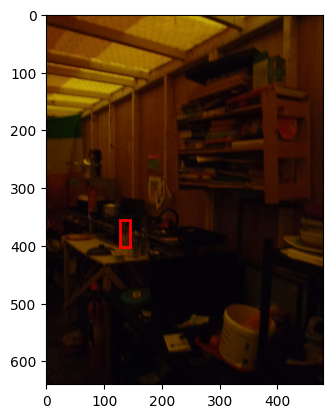


   Annotation 37 Box (x, y, w, h) = [510.67, 324.92, 15.16, 43.07] belongs to class bottle
   Annotation 40 Box (x, y, w, h) = [521.88, 332.37, 12.09, 43.9] belongs to class bottle
   Annotation 41 Box (x, y, w, h) = [544.3, 410.21, 11.38, 45.85] belongs to class bottle
   Annotation 146 Box (x, y, w, h) = [533.36, 337.88, 14.77, 47.12] belongs to class bottle


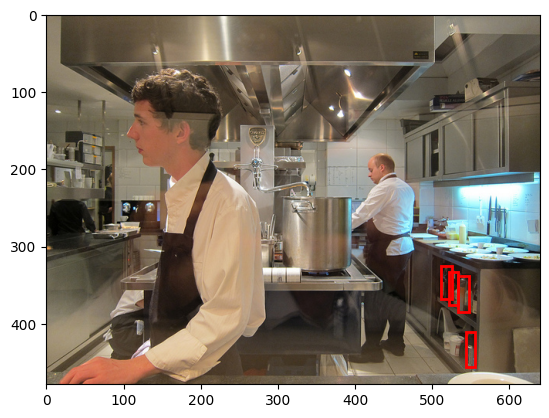


   Annotation 190 Box (x, y, w, h) = [289.51, 104.22, 16.3, 40.37] belongs to class vase


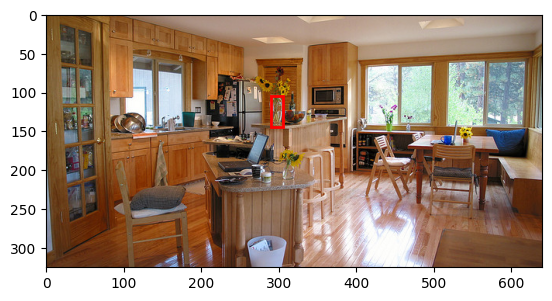


   Annotation 13 Box (x, y, w, h) = [433.91, 132.58, 14.23, 44.21] belongs to class bottle
   Annotation 15 Box (x, y, w, h) = [43.35, 160.52, 15.83, 44.73] belongs to class bottle


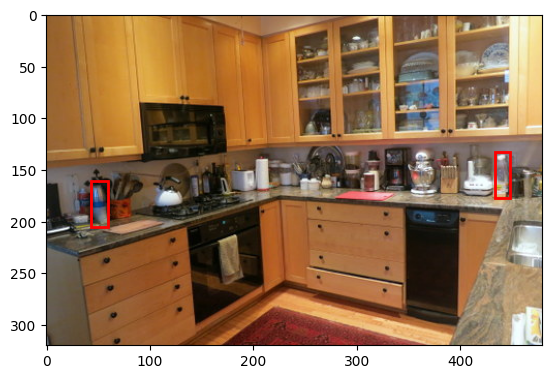

In [13]:
# Now, show the images along with the bounding boxes
# !pip install opencv-python --quiet
import cv2 
import requests
from PIL import Image
from io import BytesIO
from matplotlib import patches

for i in range(len(image_file_names)):
    response = requests.get(data['images'][image_id_to_index[image_indices[i]]]['coco_url'])
    img = Image.open(BytesIO(response.content))
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    for j in image_index_to_annotation_indices[image_id_to_index[image_indices[i]]]:
        if j in anno_indices:
        # print(f"   Annotation {j} has class {annotation_id_to_classification[j]}")
            print(f"   Annotation {j+1} Box (x, y, w, h) = {data['annotations'][j]['bbox']} belongs to class {annotation_id_to_classification[data['annotations'][j]['id']]}")
            x, y, w, h = data['annotations'][j]['bbox']
            rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
            # Add the classname there too
            # ax.text(x, y, annotation_id_to_classification[j], color='r')
            ax.add_patch(rect)

    # plt.savefig(f'./images/File{i+1}{image_file_names[i]}')
    
    plt.show()

    # print()
    # print()
    print()
# plt.show()



In [14]:
# get the url of the images from names
image_urls = []

for i in image_file_names:
    for j in data['images']:
        if i == j['file_name']:
            image_urls.append(j['coco_url'])

image_urls



['http://images.cocodataset.org/train2017/000000118113.jpg',
 'http://images.cocodataset.org/train2017/000000005802.jpg',
 'http://images.cocodataset.org/train2017/000000374628.jpg',
 'http://images.cocodataset.org/train2017/000000193271.jpg']

In [15]:
image_file_names

['000000118113.jpg',
 '000000005802.jpg',
 '000000374628.jpg',
 '000000193271.jpg']

In [16]:
'''
# display the images
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# for i in range(len(image_urls)):
#     response = requests.get(image_urls[i])
#     img = Image.open(BytesIO(response.content))
#     plt.imshow(img)

# plt.show()
# Show them in 3 columns
# fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig, axs = plt.subplots(1, len(image_urls), figsize=(20, 5))
fig.subplots_adjust(hspace = 1, wspace=.001)
axs = axs.ravel()


for i in range(len(image_urls)):
    response = requests.get(image_urls[i])
    img = Image.open(BytesIO(response.content))
    axs[i].imshow(img)
    axs[i].set_title(image_file_names[i])
    axs[i].axis('off')
plt.show()
'''


"\n# display the images\nimport requests\nfrom PIL import Image\nfrom io import BytesIO\nimport matplotlib.pyplot as plt\n\n# for i in range(len(image_urls)):\n#     response = requests.get(image_urls[i])\n#     img = Image.open(BytesIO(response.content))\n#     plt.imshow(img)\n\n# plt.show()\n# Show them in 3 columns\n# fig, axs = plt.subplots(1, 3, figsize=(15, 5))\nfig, axs = plt.subplots(1, len(image_urls), figsize=(20, 5))\nfig.subplots_adjust(hspace = 1, wspace=.001)\naxs = axs.ravel()\n\n\nfor i in range(len(image_urls)):\n    response = requests.get(image_urls[i])\n    img = Image.open(BytesIO(response.content))\n    axs[i].imshow(img)\n    axs[i].set_title(image_file_names[i])\n    axs[i].axis('off')\nplt.show()\n"

In [17]:
# Use YOLO to get the bounding boxes and class names

# Before that, update python
# !pip --version
# !pip install yolov5


In [18]:
# !pip show yolov5

In [19]:
import torch
from pathlib import Path
import os
import sys
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib import patches
from yolov5.models.experimental import attempt_load 
from yolov5.utils.general import non_max_suppression, scale_coords
from yolov5.utils.torch_utils import select_device

# Load the model
model = attempt_load('yolov5s.pt', map_location=select_device(''))
model.eval()

# Get the class names
class_names = model.module.names if hasattr(model, 'module') else model.names

# Get the bounding boxes
for i in range(len(image_urls)):
    response = requests.get(image_urls[i])
    img = Image.open(BytesIO(response.content))
    img = img.convert('RGB')
    img.save('image.jpg')
    img = Image.open('image.jpg')
    img = img.convert('RGB')
    img = img.resize((640, 640))
    img = torch.Tensor(np.array(img)).permute(2, 0, 1).unsqueeze(0).float() / 255.0
    img = img.to('cuda')
    pred = model(img, size=640)
    pred = non_max_suppression(pred, 0.4, 0.5, agnostic=True)
    pred = pred[0]
    pred = scale_coords(img.shape[2:], pred[:, :4], img.shape).round()
    fig, ax = plt.subplots(1)
    ax.imshow(np.array(img[0].permute(1, 2, 0).cpu()))
    for box in pred:
        x1, y1, x2, y2 = box
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    plt.show()

# Show them in 3 columns
fig, axs = plt.subplots(1, len(image_urls), figsize=(20, 5))
fig.subplots_adjust(hspace = 1, wspace=.001)
axs = axs.ravel()

for i in range(len(image_urls)):
    response = requests.get(image_urls[i])
    img = Image.open(BytesIO(response.content))
    img = img.convert('RGB')
    img.save('image.jpg')
    img = Image.open('image.jpg')
    img = img.convert('RGB')
    img = img.resize((640, 640))
    img = torch.Tensor(np.array(img)).permute(2, 0, 1).unsqueeze(0).float() / 255.0
    img = img.to('cuda')
    pred = model(img, size=640)
    pred = non_max_suppression(pred, 0.4, 0.5, agnostic=True)
    pred = pred[0]
    pred = scale_coords(img.shape[2:], pred[:, :4], img.shape).round()
    axs[i].imshow(np.array(img[0].permute(1, 2, 0).cpu()))
    for box in pred:
        x1, y1, x2, y2 = box
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
        axs[i].add_patch(rect)
    axs[i].set_title(image_file_names[i])
    axs[i].axis('off')

plt.show()

# Show the class names
for i in range(len(image_urls)):
    response = requests.get(image_urls[i])
    img = Image.open(BytesIO(response.content))
    img = img.convert('RGB')
    img.save('image.jpg')
    img = Image.open('image.jpg')
    img = img.convert('RGB')
    img = img.resize((640, 640))
    img = torch.Tensor(np.array(img)).permute(2, 0, 1).unsqueeze(0).float() / 255.0
    img = img.to('cuda')
    pred = model(img, size=640)
    pred = non_max_suppression(pred, 0.4, 0.5, agnostic=True)
    pred = pred[0]
    pred = scale_coords(img.shape[2:], pred[:, :4], img.shape).round()
    for box in pred:
        x1, y1, x2, y2 = box
        print(f"Image {i} has class {class_names[int(box[5])]}")
    print()



ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [20]:
# Now use Fasterrcnn to localize the digits
# Load the model


import numpy as np
import matplotlib.pyplot as plt
import torch
import PIL

import torchvision
faster_rcnn_model= torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
faster_rcnn_model.eval()


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

[{'boxes': tensor([[3.87788e+02, 7.16799e+01, 4.97920e+02, 3.52679e+02],
        [8.37856e-01, 2.62205e+02, 6.17163e+01, 3.03001e+02],
        [1.54697e+02, 1.68164e+02, 1.83266e+02, 1.85340e+02],
        [3.20170e+01, 3.43275e+02, 9.80978e+01, 3.84748e+02],
        [4.98859e+02, 2.04642e+02, 5.98953e+02, 2.26716e+02],
        [5.11430e+02, 4.42246e+01, 5.21960e+02, 9.12197e+01],
        [5.20736e+02, 4.54607e+01, 5.32267e+02, 1.11756e+02],
        [5.31001e+02, 4.18162e+01, 5.55443e+02, 1.25760e+02],
        [5.53150e+02, 4.54706e+01, 5.65793e+02, 1.10400e+02],
        [9.06899e+01, 8.78550e+00, 1.40419e+02, 9.77395e+01],
        [5.88651e+01, 2.87882e+02, 1.34896e+02, 3.25117e+02],
        [1.35381e+02, 2.50286e+02, 1.53405e+02, 2.73054e+02],
        [9.31970e-02, 3.47390e+00, 6.01575e+01, 1.50838e+02],
        [5.41670e+02, 4.45750e+01, 5.59330e+02, 1.22965e+02],
        [9.63076e+00, 2.57458e+02, 3.35135e+02, 4.24102e+02],
        [5.28753e+02, 4.51662e+01, 5.37765e+02, 1.12619e+02

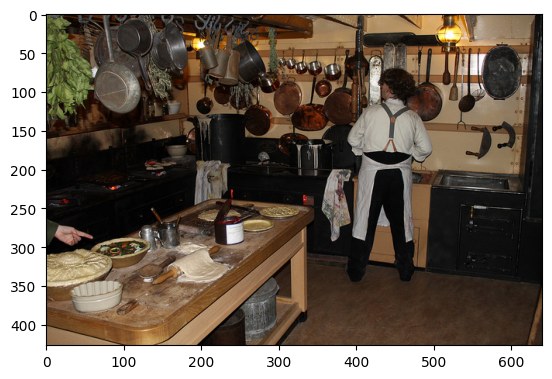

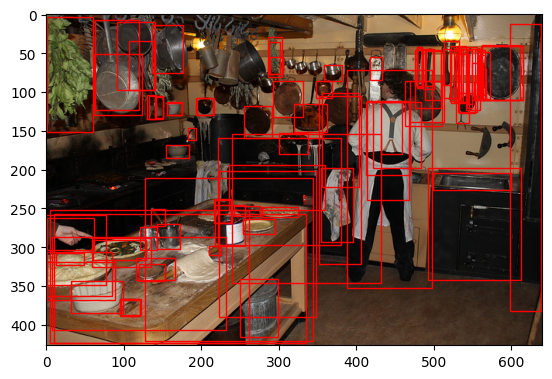

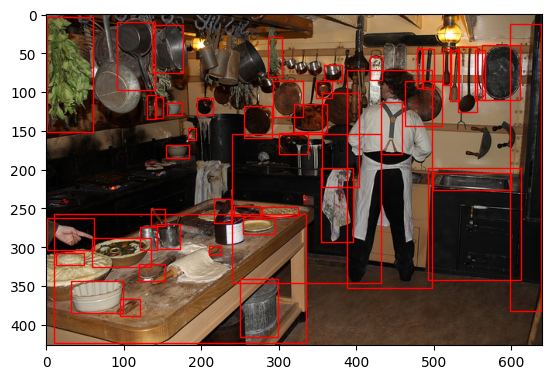

In [21]:

file_id = '000000397133'
# Now use the model to localize the digits
# Load the image from the file
image = PIL.Image.open(f'coco/val2017/{file_id}.jpg')
tensor = torchvision.transforms.functional.to_tensor(image)
output = faster_rcnn_model([tensor])
print(output)


# Now we have the bounding boxes of the digits
# Lets plot the image with the bounding boxes
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# Load the image from the file
image = PIL.Image.open('coco/val2017/' + file_id + '.jpg')


# Create figure and axes
fig,ax = plt.subplots(1)


# Display the image
ax.imshow(image)
plt.savefig('box_original.png')




# Detach the bounding boxes from the computational graph
boxes = output[0]['boxes'].detach()


# Add bounding boxes and print the image
fig, ax = plt.subplots(1)
ax.imshow(image)
for box in boxes:
    rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.savefig('box_detected.png')
plt.show()

# Now use NMR to get the best bounding boxes
from torchvision.ops import nms
keep = nms(boxes, output[0]['scores'], iou_threshold=0.15)
boxes = boxes[keep]
# print(boxes)

# Add bounding boxes and print the image
fig, ax = plt.subplots(1)
ax.imshow(image)
for box in boxes:
    rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.savefig('box_nms.png')
plt.show()




True

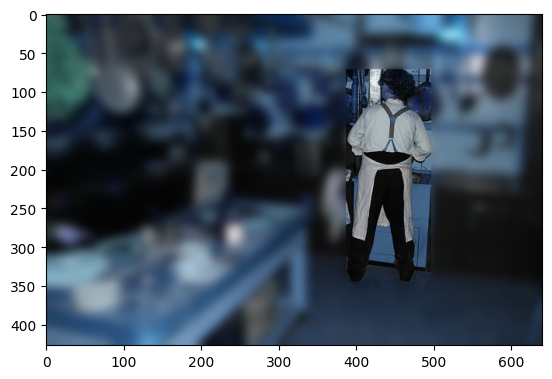

In [22]:
# Now blur the surroundings other than a particular box
import random as rr 
import cv2
import numpy as np
# that_box = rr.choice(boxes)
that_box = [387.7884,  71.6799, 497.9201, 352.6789]
# print(that_box)

# Load the image from the file
image = cv2.imread('coco/val2017/' + file_id + '.jpg')

# Convert the box coordinates to integers
x1, y1, x2, y2 = map(int, that_box)

# Blur the surroundings of the selected box
blurred_image = image.copy()
# Draw a rectangle around the selected box
# cv2.rectangle(blurred_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Apply blur to the surrounding area
# blurred_image[y1:y2, x1:x2] = cv2.GaussianBlur(blurred_image[y1:y2, x1:x2], (99, 99), 0)
regions = [[(0,x1), (0, None)], 
           [(x2,None), (0,None)],
           [(x1,x2), (0,y1)],
           [(x1,x2), (y2,None)]]
blurred_image = cv2.GaussianBlur(image, (41,41), 0) # only feasible 2-tuples are 
blurred_image[y1:y2, x1:x2] = image[y1:y2, x1:x2] # only feasible 2-tuples a 
# Display the image with blurred surroundings
# for rx,ry in regions:
    # blurred_image[ry[0]:ry[1], rx[0]:rx[1]] = cv2.GaussianBlur(blurred_image[ry[0]:ry[1], rx[0]:rx[1]], (41,41), 0) # only feasible 2-tuples are 
    # blurred_image[ry[0]:ry[1], rx[0]:rx[1]] = cv2.GaussianBlur(blurred_image[ry[0]:ry[1], rx[0]:rx[1]], (99,99), 0)
    



plt.imshow(blurred_image)
# saveit 
cv2.imwrite('box_only.jpg', blurred_image)

# cv2.imshow('Image with Blurred Surroundings', blurred_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()



In [23]:
plt.savefig('box_only.png')

<Figure size 640x480 with 0 Axes>

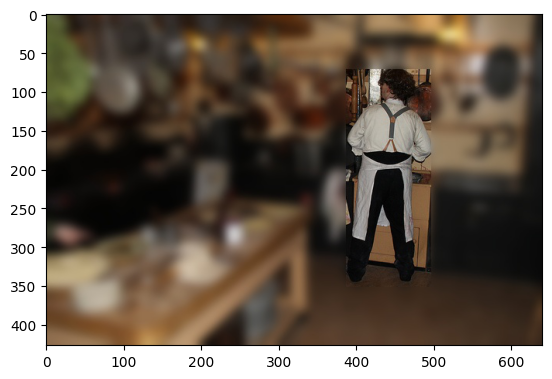

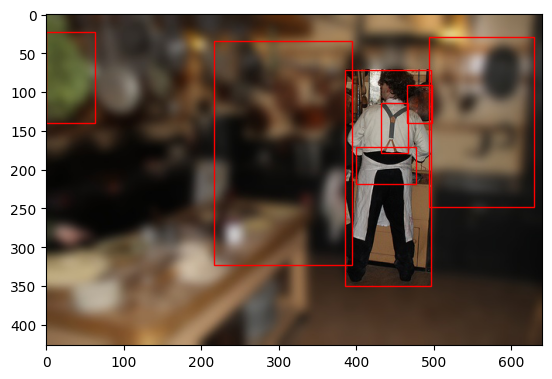

In [24]:
# conduct region proposals on box_only.jpg
# Load the image from the file
image = PIL.Image.open('box_only.jpg')
tensor = torchvision.transforms.functional.to_tensor(image)
output = faster_rcnn_model([tensor])
# print(output)


# Now we have the bounding boxes of the digits
# Lets plot the image with the bounding boxes
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# Load the image from the file
image = PIL.Image.open('box_only.jpg')
# Create figure and axes
fig,ax = plt.subplots(1)
# Display the image
ax.imshow(image)

# # Detach the bounding boxes from the computational graph
# boxes = output[0]['boxes'].detach()
# pefom nms
boxes = output[0]['boxes'].detach()
keep = nms(boxes, output[0]['scores'], iou_threshold=0.15)
boxes = boxes[keep]
# Add bounding boxes and print the image
fig, ax = plt.subplots(1)
ax.imshow(image)
for box in boxes:
    rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.show()


In [26]:
# Now perform Object Classification on the detected boxes, along with the confidence scores
# Load the image from the file
image = PIL.Image.open('box_only.jpg')
tensor = torchvision.transforms.functional.to_tensor(image)
output = faster_rcnn_model([tensor])

# nms
boxes = output[0]['boxes'].detach()
keep = nms(boxes, output[0]['scores'], iou_threshold=0.15)
boxes = boxes[keep]

# Perform Object Classification on the detected boxes, along with the confidence scores
for i, box in enumerate(boxes):
    x1, y1, x2, y2 = map(int, box)
    cropped_image = image.crop((x1, y1, x2, y2))
    cropped_tensor = torchvision.transforms.functional.to_tensor(cropped_image)
    cropped_tensor = cropped_tensor.unsqueeze(0)
    output = faster_rcnn_model(cropped_tensor)
    # print(f"Box {i+1} has class {output[0]['labels'][0]} with confidence {output[0]['scores'][0]}")
    if len(output[0]['labels']) > 0:
        print(f"Box {i+1} has class {output[0]['labels'][0]} with confidence {output[0]['scores'][0]}")
    # print(f"Box {i+1} has class {output[0]['labels']} with confidence {output[0]['scores']}")
    print()
    

# Now use YOLO to get the bounding boxes and class names
# Load the model
# !pip install models
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

from yolov5.models

# Get the class names
class_names = model.module.names if hasattr(model, 'module') else model.names

# Get the bounding boxes
# Load the image from the file
image = PIL.Image.open('box_only.jpg')
image = image.convert('RGB')
img = img.resize((640, 640))
img = torch.Tensor(np.array(img)).permute(2, 0, 1).unsqueeze(0).float() / 255.0

pred = model(img, size=640)
pred = non_max_suppression(pred, 0.4, 0.5, agnostic=True)
pred = pred[0]
pred = scale_coords(img.shape[2:], pred[:, :4], img.shape).round()
fig, ax = plt.subplots(1)
ax.imshow(np.array(img[0].permute(1, 2, 0).cpu()))
for box in pred:
    x1, y1, x2, y2 = box
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.show()



Box 1 has class tensor([ 1,  1, 62, 31,  1, 32, 31, 62, 27, 62, 32,  1, 31, 87,  1, 27, 27, 62, 62,  1, 32,  1,  1,  1, 32, 31, 62, 28]) with confidence tensor([0.97405, 0.83965, 0.70730, 0.58104, 0.52014, 0.44205, 0.27008, 0.21556, 0.20708, 0.17943, 0.15547, 0.12501, 0.12269, 0.11627, 0.10285, 0.09695, 0.08987, 0.08852, 0.08652, 0.08208, 0.08062, 0.07416, 0.06915, 0.06187, 0.05917, 0.05650, 0.05636, 0.05065], grad_fn=<IndexBackward0>)

Box 2 has class tensor([], dtype=torch.int64) with confidence tensor([], grad_fn=<IndexBackward0>)

Box 3 has class tensor([ 1,  1, 62]) with confidence tensor([0.06774, 0.05980, 0.05537], grad_fn=<IndexBackward0>)

Box 4 has class tensor([ 1,  1, 17,  1,  1,  1,  1,  1, 17]) with confidence tensor([0.89038, 0.49701, 0.28905, 0.12378, 0.10290, 0.09755, 0.07354, 0.06464, 0.05126], grad_fn=<IndexBackward0>)

Box 5 has class tensor([ 1, 17,  1, 17]) with confidence tensor([0.49031, 0.23012, 0.07295, 0.06706], grad_fn=<IndexBackward0>)

Box 6 has class tens

NameError: name 'attempt_load' is not defined

In [44]:
# Now use YOLO to get the bounding boxes and class names
# Load the model
# !pip install models
# !git clone https://github.com/ultralytics/yolov5.git
# %cd yolov5
# !pip install -r requirements.txt

from yolov5.models import attempt_load # import the YOLO model
from yolov5.utils.general import non_max_suppression # import the NMS function
from yolov5.utils.torch_utils import select_device # import the device selection function

device = select_device('') # select the device to run the model on
# model = attempt_load('yolov5s.pt', map_location=device) # load the YOLOv5s model
model = attempt_load('yolov5s.pt', map_location=device) # load the YOLOv5s model
model.eval() # set the model to evaluation mode

# Perform object detection with YOLO on the image
with torch.no_grad(): # disable gradient computation
    output = model(tensor, augment=False)[0] # run the model on the input tensor
    output = non_max_suppression(output, conf_thres=0.25, iou_thres=0.45) # apply NMS to the output

# Print the bounding boxes and class names
for i, det in enumerate(output): # loop over the detections
    if len(det): # if there are any detections
        det[:, :4] = det[:, :4].round() # round the coordinates
        for *xyxy, conf, cls in reversed(det): # loop over each detection
            print(f"Box {i+1} has class {int(cls)} with confidence {conf:.2f}") # print the class and confidence
            print()


ImportError: cannot import name 'attempt_load' from 'yolov5.models' (c:\Users\user\anaconda3\lib\site-packages\yolov5\models\__init__.py)